In [1]:
import numpy as np
import import_data_from_3D_ncfiles as import_data
import os
from matplotlib import pyplot as plt

In [6]:
ls

24_08_22_Long_box_run_0/
24_08_23_longbox_magnetic_cloud_0/
24_08_23_longbox_magnetic_cloud_1/
24_08_23_longbox_magnetic_cloud_then_flat_0/
24_08_23_longbox_magnetic_cloud_without_flat_end/
24_08_23_longbox_steady_0/
24_08_23_longbox_steady_state_thanks_to_flat/
24_08_23_longbox_work_please/
24_08_23_longbox_work_please_1/
24_08_24_steady_thanks_to_flat_4/
24_08_24_steady_thanks_to_flat_5/
24_08_24_steady_thanks_to_flat_5_without_tar_files/
import_data_from_3D_ncfiles.py
plot_lines.ipynb
__pycache__/


In [7]:
##############################################################
# Modify filepath and filepath_out
##############################################################

run = '24_08_24_steady_thanks_to_flat_5_without_tar_files/'

data_directory = run + '/ncfiles/ncfiles/'
filepath_out = run + '/analysis/'

if not os.path.exists(filepath_out):
    os.mkdir(filepath_out)

In [8]:
##############################################################
# List times     
##############################################################

times = []
for file in os.listdir(data_directory):
    time = file[-8:-3]
    time = int(time)
    times.append(time)
    
times = sorted(list(set(times)))

Extracting simulation data for time 00000
Extracting simulation data for time 00010
Extracting simulation data for time 00015
Extracting simulation data for time 00020
Extracting simulation data for time 00025
Extracting simulation data for time 00030
Extracting simulation data for time 00035
Extracting simulation data for time 00040
Extracting simulation data for time 00045
Extracting simulation data for time 00050
Extracting simulation data for time 00055
Extracting simulation data for time 00060
Extracting simulation data for time 00065
Extracting simulation data for time 00070
Extracting simulation data for time 00075
Extracting simulation data for time 00080
Extracting simulation data for time 00085
Extracting simulation data for time 00090
Extracting simulation data for time 00095
Extracting simulation data for time 00100
Extracting simulation data for time 00105
Extracting simulation data for time 00110
Extracting simulation data for time 00115
Extracting simulation data for tim

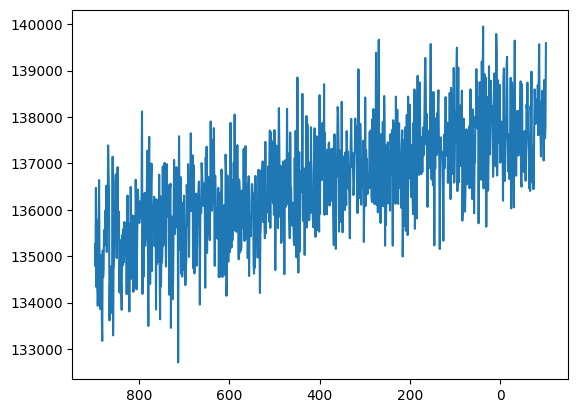

In [9]:
for time in times:
    time_string = str(time).zfill(5)
    
    ##############################################################
    # Extract Data      
    ##############################################################

    x, y, z, nx0, ny0, nz0, N, T, Vx, Vy, Vz, V, Ex, Ey, Ez, E, Bx, By, Bz, B = import_data.load_data_3D(data_directory, time)

    ##############################################################
    # Average along y and z axis to get a line (this only makes sense for a "long" box)    
    ##############################################################

    E_long = np.mean(E[:-2,:,:], axis=(1,2))
    B_long = np.mean(B[:-2,:,:], axis=(1,2))
    V_long = np.mean(V[:-2,:,:], axis=(1,2))
    N_long = np.mean(N[:-2,:,:], axis=(1,2))
    
    plt.clf()
    plt.plot(x[:-2], N_long)
    plt.gca().invert_xaxis()
    plt.savefig(filepath_out + f"N_{time}")
    
    plt.clf()
    plt.plot(x[:-2], B_long)
    plt.gca().invert_xaxis()
    plt.savefig(filepath_out + f"B_{time}")
    
    plt.clf()
    plt.plot(x[:-2], V_long)
    plt.gca().invert_xaxis()
    plt.savefig(filepath_out + f"V_{time}")

**Note:**
The units are not all in SI.

[B] = nT 

[V] = m/s

[E] = nV/m [?]

[N] = number / cubic centimetre

[T] = eV

[x] = $c \omega_{pi}$

In [10]:
np.shape(Ex)

(1002, 10, 10)

In [11]:
Vx

array([[[  -0.     ,   -0.     ,   -0.     , ...,   -0.     ,
           -0.     ,   -0.     ],
        [       nan,        nan,        nan, ...,        nan,
                nan,   -0.     ],
        [       nan,        nan,        nan, ...,        nan,
                nan,   -0.     ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,   -0.     ],
        [       nan,        nan,        nan, ...,        nan,
                nan,   -0.     ],
        [       nan,        nan,        nan, ...,        nan,
                nan,   -0.     ]],

       [[  -0.     ,   -0.     ,   -0.     , ...,   -0.     ,
           -0.     ,   -0.     ],
        [-409.33884, -390.65536, -414.2808 , ..., -413.68298,
         -425.88477,   -0.     ],
        [-426.02045, -399.67984, -416.0394 , ..., -413.8598 ,
         -429.31073,   -0.     ],
        ...,
        [-365.3498 , -419.84375, -420.4679 , ..., -410.81458,
         -395.53973,   -0.     ],
        [-41